In [1]:
import os
from pprint import pprint
from csv import reader

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score,v_measure_score
from sklearn import linear_model,preprocessing

from scipy.optimize import minimize, Bounds
from scipy.linalg import orth, eigh

import statsmodels.api
import statsmodels as sm

import anndata
import scanpy

from glmpca import glmpca

import csv

/n/fs/ragr-data/users/uchitra/miniconda3/envs/spatial-trans/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/n/fs/ragr-data/users/uchitra/miniconda3/envs/spatial-trans/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [14]:
import sys

sys.path.append('src')
from utils import *
from dp_related import *
from dp_post_processing import *

ModuleNotFoundError: No module named 'dp_related'

# tutorial

In [7]:
sample='151507'

##############################################
# LOAD DATA
##############################################

adata = anndata.read_h5ad("/n/fs/ragr-data/users/congma/Codes/spatial_embedding/data/{}/sample_{}.h5ad".format(sample,sample))

int_data=adata.layers['count'].T
G,N=int_data.shape

coords=adata.obsm["X_pos"]


## testing with using buckets

In [8]:
# load GLMPCA

trial=0
base_folder='/n/fs/ragr-research/projects/network-mutations/spatial_trans/F_glmpca_2d/'
F_glmpca=np.load(base_folder+'F_glmpca_2d_{}_penalty_10_trial_{}.npy'.format(sample,trial))

In [9]:
losses,labels=rotation_dp(F_glmpca.T, coords, use_buckets=True)


 angle: 0
running DP
finding segments for 1 layers
1 (6, 8) (150, 8)
finding segments for 2 layers
2 (6, 8) (150, 8)
finding segments for 3 layers
3 (6, 8) (150, 8)
finding segments for 4 layers
4 (6, 8) (150, 8)
finding segments for 5 layers
5 (6, 8) (150, 8)
finding segments for 6 layers
6 (6, 8) (150, 8)
finding segments for 7 layers
7 (6, 8) (150, 8)
finding segments for 8 layers
8 (6, 8) (150, 8)

 angle: 5
running DP
finding segments for 1 layers
1 (6, 8) (150, 8)
finding segments for 2 layers
2 (6, 8) (150, 8)
finding segments for 3 layers
3 (6, 8) (150, 8)
finding segments for 4 layers
4 (6, 8) (150, 8)
finding segments for 5 layers
5 (6, 8) (150, 8)
finding segments for 6 layers
6 (6, 8) (150, 8)
finding segments for 7 layers
7 (6, 8) (150, 8)
finding segments for 8 layers
8 (6, 8) (150, 8)

 angle: 10
running DP
finding segments for 1 layers
1 (6, 8) (150, 8)
finding segments for 2 layers
2 (6, 8) (150, 8)
finding segments for 3 layers
3 (6, 8) (150, 8)
finding segments for 

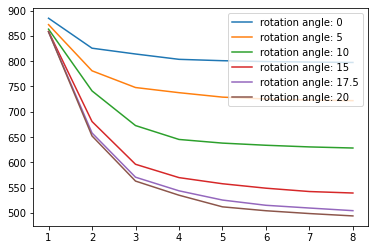

In [10]:
plot_angle_selection(losses)

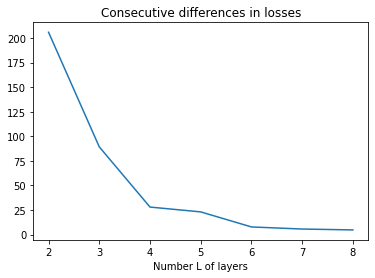

In [15]:
best_angle=20
plot_consecutive_diffs(losses, best_angle)

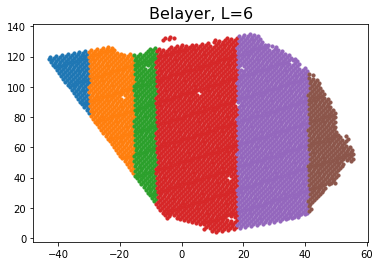

In [18]:
best_L=6
belayer_labels=belayer_output(labels, coords, best_L, best_angle)

## testing without buckets

In [9]:
# load GLMPCA

trial=0
base_folder='/n/fs/ragr-research/projects/network-mutations/spatial_trans/F_glmpca_2d/'
F_glmpca=np.load(base_folder+'F_glmpca_2d_{}_penalty_10_trial_{}.npy'.format(sample,trial))

In [10]:
subsample_spots=np.random.choice(N,size=400,replace=False)
coords2=coords[subsample_spots,:]
F_glmpca2=F_glmpca[subsample_spots,:]


losses,labels=rotation_dp(F_glmpca2.T, coords2, use_buckets=False)


 angle: 0
running DP without buckets
finding segments for 1 layers
finding segments for 2 layers
finding segments for 3 layers
finding segments for 4 layers
finding segments for 5 layers
finding segments for 6 layers
finding segments for 7 layers
finding segments for 8 layers

 angle: 5
running DP without buckets
finding segments for 1 layers
finding segments for 2 layers
finding segments for 3 layers
finding segments for 4 layers
finding segments for 5 layers
finding segments for 6 layers
finding segments for 7 layers
finding segments for 8 layers

 angle: 10
running DP without buckets
finding segments for 1 layers
finding segments for 2 layers
finding segments for 3 layers
finding segments for 4 layers
finding segments for 5 layers
finding segments for 6 layers
finding segments for 7 layers
finding segments for 8 layers

 angle: 15
running DP without buckets
finding segments for 1 layers
finding segments for 2 layers
finding segments for 3 layers
finding segments for 4 layers
findin

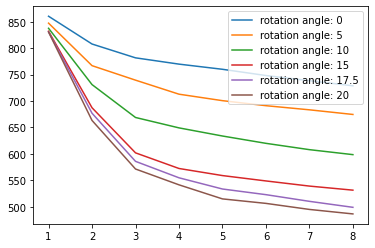

In [11]:
plot_angle_selection(losses)

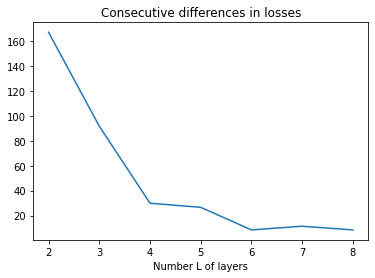

In [12]:
best_angle=20
plot_consecutive_diffs(losses, best_angle)

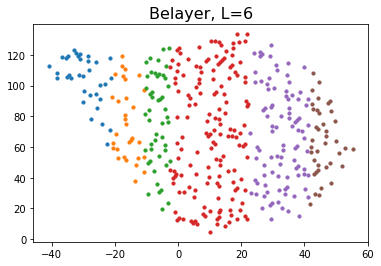

In [13]:
best_L=6
belayer_labels=belayer_output(labels, coords2, best_L, best_angle)